# Classification

## Objectives

*  Fit and evaluate a classification model to predict if a prospect will churn or not.

## Inputs

* outputs/datasets/collection/TelcoCustomerChurn.csv
* Instructions on which variables to use for data cleaning and feature engineering. They are found in each respective notebook.

## Outputs

* Train set (features and target)
* Test set (features and target)
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* Feature importance plot



---

# Change working directory

Change the working directory from its current folder to its parent folder


In [20]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

Make the parent of the current directory the new current directory.


In [21]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [22]:
current_dir = os.getcwd()
current_dir

'/workspace'

---

# Load Data 

Load Transformers

In [23]:
import joblib
import pandas as pd
import numpy as np

model_path = "/workspace/Film_Hit_prediction/outputs/datasets/engineered/"

le_language = joblib.load(model_path + 'language_encoder.joblib')
scaler = joblib.load(model_path + 'budget_scaler.joblib')
scaler_y = joblib.load(model_path + 'revenue_scaler.joblib')


Load Data

In [24]:
import pandas as pd
import joblib
model_path = "/workspace/Film_Hit_prediction/outputs/datasets/engineered/"
X_train_final = pd.read_csv(model_path + 'X_train_final.csv')
X_test_final = pd.read_csv(model_path + 'X_test_final.csv')
y_train_final = pd.read_csv(model_path + 'y_train_final.csv')
y_test_final = pd.read_csv(model_path + 'y_test_final.csv') 

Print to verify it loaded correctly

In [25]:
#Check to ensure everything loaded correctly
print("Data shapes:")
print(f"X_train_final: {X_train_final.shape}")
print(f"X_test_final: {X_test_final.shape}")
print(f"y_train_final: {y_train_final.shape}")
print(f"y_test_final: {y_test_final.shape}")

Data shapes:
X_train_final: (2054, 22)
X_test_final: (961, 22)
y_train_final: (2054, 1)
y_test_final: (961, 1)


---

# Step 2: ML Pipeline with all data

## ML Pipeline for Modelling and Hyperparameter Optimisation

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define models

models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.01, 0.1, 0.3],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}


# Grid Search

In [27]:


results = {}
best_models = {}

for name, model_info in models.items():
    print(f"\nTraining {name}...")

    # GridSearchCV performs the hyperparameter optimization
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

  


Training Linear Regression...

Training Ridge...

Training Lasso...

Training Random Forest...

Training Gradient Boosting...


# Fit the model with different parameter combinations

In [28]:
grid_search.fit(X_train_final, y_train_final)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

 Save best model and its parameters

In [29]:
best_models[name] = grid_search.best_estimator_
y_pred = grid_search.predict(X_test_final)

mse = mean_squared_error(y_test_final, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_final, y_pred)
mae = mean_absolute_error(y_test_final, y_pred)

results[name] = {
    'Best Parameters': grid_search.best_params_,
    'Best Score': -grid_search.best_score_,
    'RMSE': rmse,
    'R2 Score': r2,
    'MAE': mae
}

# Print results
print("\nModel Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"Best Estimator: {grid_search.best_estimator_}")
print("\nPredictions Sample:")
print(y_pred[:5])




Model Results:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best Score: 0.9417673767579142
RMSE: 1.08
R² Score: 0.1166
MAE: 0.94
Best Estimator: GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=42,
                          subsample=0.8)

Predictions Sample:
[ 0.3679598  -1.56393815 -0.23748559 -0.182321   -0.66354094]


Calcualte multiple metrics

## Assess feature importance


Top 10 Most Important Features:
            Feature  Importance
0  language_encoded    0.061967
1     budget_scaled    0.574382
2            Action    0.008685
3         Adventure    0.025629
4         Animation    0.009046
5            Comedy    0.025415
6             Crime    0.034883
7       Documentary    0.009065
8             Drama    0.041772
9            Family    0.014588


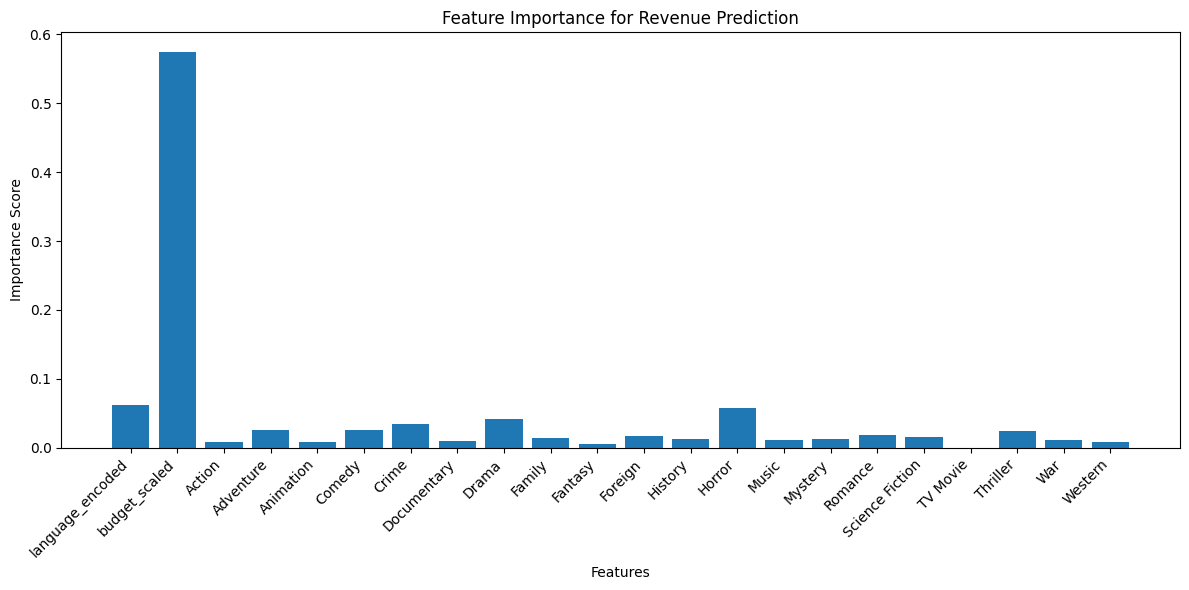

In [30]:
# Get feature importance from GradientBoostingRegressor model
feature_importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': best_models['Gradient Boosting'].feature_importances_
})

# Print feature importance
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# bar plot of feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance for Revenue Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Prediction Model


Create a function to make predictions for new movies based on parameters:
-  budget (float): Movie budget in dollars
- language (str): Original language (e.g., 'en' for English)
- genres (list): List of genres (e.g., ['Action', 'Adventure'])
    
 Returns:
- float: Predicted revenue and profit

In [31]:


# Function to make predictions
def predict_movie_metrix(budget, language, genres):
    engineered_path = "/workspace/Film_Hit_prediction/outputs/datasets/engineered/"
    model_path = "/workspace/Film_Hit_prediction/outputs/models/"

    # Load necessary encoders and model
    le_language = joblib.load(engineered_path + 'language_encoder.joblib')
    scaler = joblib.load(engineered_path + 'budget_scaler.joblib')
    scaler_y = joblib.load(engineered_path + 'revenue_scaler.joblib')
    model = joblib.load(model_path + 'movie_revenue_predictor.joblib')

    all_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                    'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                    'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                    'TV Movie', 'Thriller', 'War', 'Western','Foreign']

# All gengres as 0 initialy
    genre_dict ={genre: 0 for genre in all_genres}

# Set selected gengres to 1
    for genre in genres:
        if genre in genre_dict:
            genre_dict[genre] = 1

# Process budget
    budget_logged = np.log1p(budget)
    budget_scaled = scaler.transform([[budget_logged]])[0][0]

# Process language
    language_encoded = le_language.transform([language])[0]

# Create feature array
    features = {
        'language_encoded': language_encoded,
        'budget_scaled': budget_scaled,
        **genre_dict
    }
    input_df = pd.DataFrame([features])
    input_df = input_df[X_train_final.columns]

 # Get revenue prediction directly from model
    predicted_revenue = model.predict(input_df)[0]
    print(f"Raw prediction: {predicted_revenue}")

    predicted_revenue = scaler_y.inverse_transform([[predicted_revenue]])[0][0] * budget / 10
    print(f"Final prediction: {predicted_revenue}")

    

    # Calculate metrics
    profit_loss = predicted_revenue - budget

    result= {
        'predicted_revenue':predicted_revenue,
        'budget':budget,
        'profit_loss': profit_loss,
        'is_profitable': profit_loss > 0,
        'profit_amount': max(0, profit_loss),
        'loss_amount': abs(min(0, profit_loss)),
        'roi': (profit_loss / budget) * 100 if budget > 0 else 0
        }


    # Print results
    print(f"Budget: ${result['budget']:,.2f}")
    print(f"Predicted Revenue: ${result['predicted_revenue']:,.2f}")
    if result['is_profitable']:
        print(f"PROFIT: ${result['profit_amount']:,.2f}")
    else:
        print(f"LOSS: ${result['loss_amount']:,.2f}")
    print(f"ROI: {result['roi']:.2f}%")

    return result



# Example usage:
test_movie = {
    'budget': 100000000,
    'language': 'en',
    'genres': ['fantasy']
}

result = predict_movie_metrix(
    test_movie['budget'],
    test_movie['language'],
    test_movie['genres']
)







Raw prediction: 0.44859671582908694
Final prediction: 161497292.87544504
Budget: $100,000,000.00
Predicted Revenue: $161,497,292.88
PROFIT: $61,497,292.88
ROI: 61.50%


Testing

In [32]:
test_cases = [
    {'budget': 2000000, 'language': 'en', 'genres': ['horror']},  # Low budget horror
    {'budget': 300000000, 'language': 'en', 'genres': ['action', 'adventure']},  # Blockbuster
    {'budget': 90000000, 'language': 'fr', 'genres': ['comedy']},  # Mid-budget foreign
]

for movie in test_cases:
    print("\nTesting:", movie)
    result = predict_movie_metrix(movie['budget'], movie['language'], movie['genres'])


Testing: {'budget': 2000000, 'language': 'en', 'genres': ['horror']}
Raw prediction: -0.4666801847235089
Final prediction: 1832323.6358801678
Budget: $2,000,000.00
Predicted Revenue: $1,832,323.64
LOSS: $167,676.36
ROI: -8.38%

Testing: {'budget': 300000000, 'language': 'en', 'genres': ['action', 'adventure']}
Raw prediction: -0.5260871942374634
Final prediction: 261241424.42763138
Budget: $300,000,000.00
Predicted Revenue: $261,241,424.43
LOSS: $38,758,575.57
ROI: -12.92%

Testing: {'budget': 90000000, 'language': 'fr', 'genres': ['comedy']}
Raw prediction: 0.6236536882288432
Final prediction: 157376555.20105657
Budget: $90,000,000.00
Predicted Revenue: $157,376,555.20
PROFIT: $67,376,555.20
ROI: 74.86%


# Evaluation


Load model

In [33]:
import joblib

model_path = "/workspace/Film_Hit_prediction/outputs/models/"  

model = joblib.load(model_path + 'movie_revenue_predictor.joblib')

print("Model loaded:", type(model))

Model loaded: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


Make predictions on test data 

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define Genres
all_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
              'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
              'TV Movie', 'Thriller', 'War', 'Western', 'Foreign']


#Evaluation
test_predictions = []
test_profit = []

# Get predictions for test set
y_pred = model.predict(X_test_final)
test_predictions = y_pred.tolist()


#Caluclate metrics

print("Revenue Prediction Metrics:")
print(f"R2 Score: {r2_score(y_test_final, test_predictions):.3f}")
print(f"MAE: ${mean_absolute_error(y_test_final, test_predictions):,.2f}")
print(f"RMSE: ${mean_squared_error(y_test_final, test_predictions, squared=False):,.2f}")




Revenue Prediction Metrics:
R2 Score: 0.150
MAE: $0.89
RMSE: $1.06


Vizualization predictions vs actual values

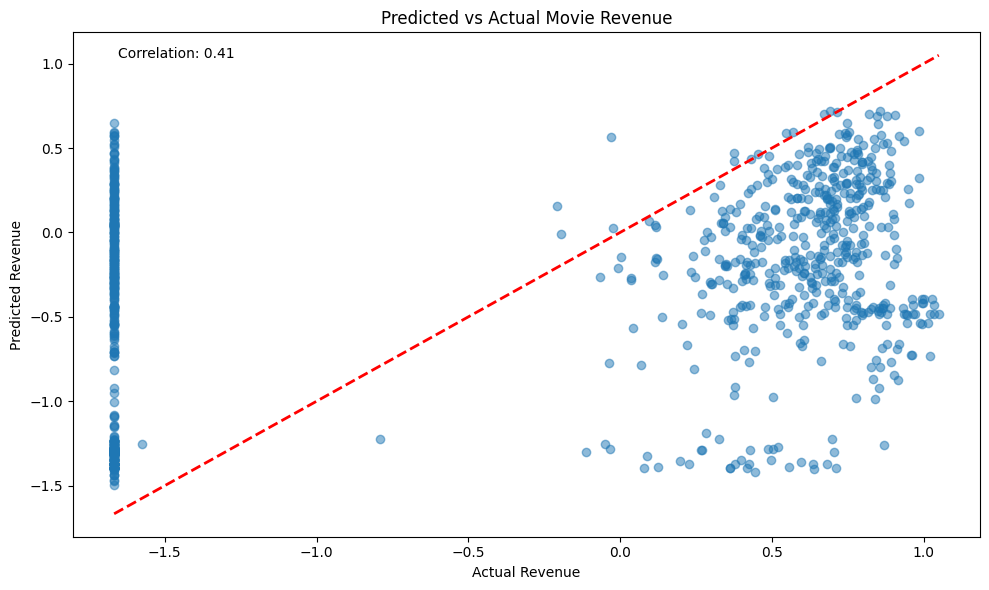

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_final, y_pred, alpha=0.5)
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--', lw=2)

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted vs Actual Movie Revenue')

# correlation coefficient
correlation = np.corrcoef(y_test_final.squeeze(), y_pred)[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

Residual Analysis

verify size 

Match sizes

In [36]:
print("Training set shape:", X_train_final.shape)
print("Test set shape:", X_test_final.shape)
print("y_train shape:", y_train_final.shape)
print("y_test shape:", y_test_final.shape)
print("y_pred shape:", y_pred.shape)

Training set shape: (2054, 22)
Test set shape: (961, 22)
y_train shape: (2054, 1)
y_test shape: (961, 1)
y_pred shape: (961,)


In [37]:
print([var for var in globals() if 'y_' in var])

['y_train_final', 'y_test_final', 'y_pred']


plot

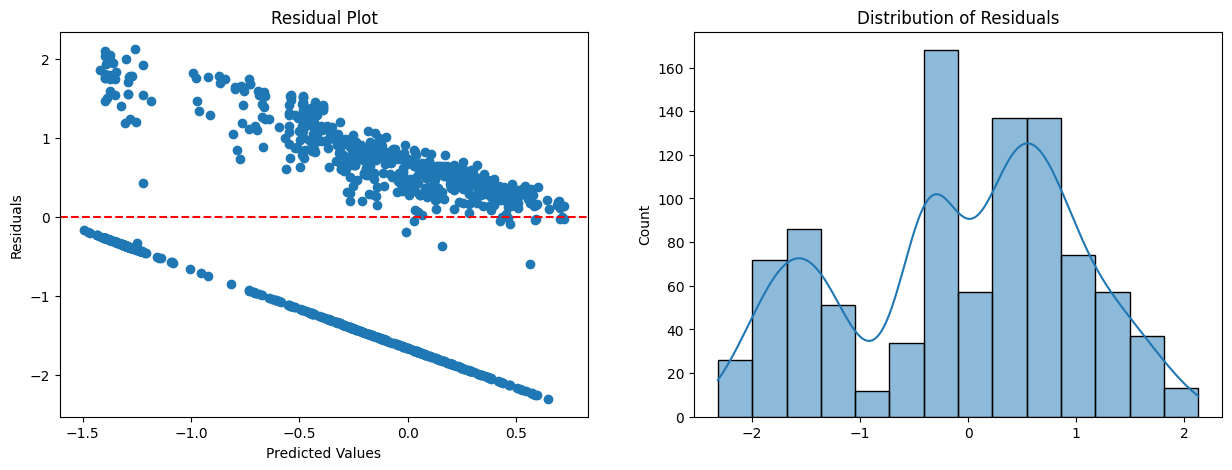

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test_final.values.ravel() - y_pred

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

Learning Curves

In [39]:
from sklearn.model_selection import learning_curve 

model = joblib.load('outputs/models/movie_revenue_predictor.joblib')

train_sizes, train_scores, test_scores = learning_curve(
    model, 
    X_train_final.values, 
    y_train_final.values,
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/models/movie_revenue_predictor.joblib'

In [ ]:
print("\nModel Evaluation Metrics:")
print(f"R² Score: {r2_score(y_test_final, y_pred):.3f}")
print(f"MAE: ${mean_absolute_error(y_test_final, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test_final, y_pred)):.2f}")